In [12]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
import numpy as np
import pickle
from scipy.optimize import curve_fit
from lpu3dnet.post_process.kr_process import *
from sklearn.metrics import mean_squared_error, mean_absolute_error




root_dir = 'db'
ct_idx = 1
vol_dim = 3
with open(f'{root_dir}/sample_{ct_idx}/phys_results_{vol_dim}.pickle', 'rb') as file:
    # Deserialize the data from the file and assign it to a variable
    sim_results = pickle.load(file)

def calculate_error_metrics(predictions, true_value, metric='mse'):
    """
    Calculate error metrics for a list of predictions against a true value.

    Args:
    predictions (list): List of prediction values.
    true_value (float): The true value to compare against.
    metric (str): Specify 'mse' for Mean Squared Error or 'mae' for Mean Absolute Error.

    Returns:
    float: The calculated error metric.
    """
    # Repeat the true value to match the length of predictions
    true_values = [true_value] * len(predictions)
    
    if metric == 'mse':
        return mean_squared_error(true_values, predictions)
    elif metric == 'mae':
        return mean_absolute_error(true_values, predictions)
    else:
        raise ValueError("Metric must be 'mse' or 'mae'")


def plot_ensemble_results(sim_results, sample_idx, metric='mse'):
    # df_all_compare = aggregate_kr(sim_results['compare'])
    num_pred = len(sim_results[sample_idx]['generate'])
    num_compare = len(sim_results['compare'])

    prediction = {'data':[],'par':[]}
    compare = {'data':[],'par':[]}


    for i in range(num_pred):
        if sim_results[sample_idx]['generate'][i]:
            df_pred = convert_dict_to_pd(sim_results[sample_idx]['generate'][i])
            corey_fit = Corey_fit(df_pred)
            kr_avg_pred,par,criteria = corey_fit.generate_kr_data()
            if criteria:
                prediction['data'].append(kr_avg_pred)
                prediction['par'].append(par)
        


    for i in range(num_compare):
        df_compare = convert_dict_to_pd(sim_results['compare'][i])
        corey_fit = Corey_fit(df_compare)
        kr_avg_compare,par,criteria = corey_fit.generate_kr_data()
        if criteria:
            compare['data'].append(kr_avg_compare)
            compare['par'].append(par)

    df_real = sim_results[sample_idx]['original']
    # fit the real data
    df_real = convert_dict_to_pd(df_real)
    corey_fit = Corey_fit(df_real)
    kr_real,par_real,criteria = corey_fit.generate_kr_data()
    print(criteria)


    #%%

    # you need to balance the number of samples

    prediction_data = prediction['data']
    compare_data = compare['data']
    num_samples = min(len(prediction_data), len(compare_data))
    irr_sw_pred = [x[0][1] for x in prediction['par']][:num_samples]
    irr_sw_compare = [x[0][1] for x in compare['par']][:num_samples]
    res_gas_pred = [x[1][1] for x in prediction['par']][:num_samples]
    res_gas_compare = [x[1][1] for x in compare['par']][:num_samples]


    from sklearn.metrics import mean_squared_error, mean_absolute_error
    # calculate error
    err_mse_swir_pred = calculate_error_metrics(
        irr_sw_pred,
        par_real[0][1], metric='mse'
        )
    err_mse_swir_compare = calculate_error_metrics(
        irr_sw_compare,
        par_real[0][1], metric='mse'
        )

    print(err_mse_swir_pred, err_mse_swir_compare)



    # f = plt.figure(figsize=(6, 4))
    # for i in range(num_samples):
        
    #     plt.plot(
    #         prediction_data[i]['sw'],
    #         prediction_data[i]['krnw'],
    #         'r-',linewidth=2,alpha=0.4
    #         )
        
    #     plt.plot(
    #         compare_data[i]['sw'],
    #         compare_data[i]['krnw'], 'y*',linewidth=1,alpha=0.4
    #         )
    #     plt.title('Exponential Fit to Relative Permeability')
    #     plt.xlabel('Water Saturation (Sw)')
    # plt.plot(kr_real['sw'], kr_real['krnw'], color='blue',linewidth=5, label='Actual Data')
    # plt.plot(df_real['sw'], df_real['kr_air'], color='blue', label='Actual Data')
    # plt.show()




    f = plt.figure(figsize=(6, 4))
    for i in range(num_samples):
        plt.plot(
            prediction_data[i]['sw'],
            prediction_data[i]['krw'], 'r-',linewidth=2,alpha=0.4
            )
        plt.plot(compare_data[i]['sw'],
                compare_data[i]['krw'],
                'y*',
                linewidth=1,alpha=0.4
                )
        plt.title('Exponential Fit to Relative Permeability')
        plt.xlabel('Water Saturation (Sw)')
    plt.plot(kr_real['sw'], kr_real['krw'], color='blue',linewidth=5, label='Actual Data')
    plt.plot(df_real['sw'], df_real['kr_water'], color='blue', label='Actual Data')
    plt.grid(True)

    plt.show()


    # f = plt.figure(figsize=(10, 6))

    # # Plot histograms for both sets of predictions
    # plt.hist(irr_sw_pred, bins=20, alpha=0.5, label='Predictions')
    # plt.hist(irr_sw_compare[:num_samples], bins=20, alpha=0.5, label='Compare')

    # # Plot a vertical line for the true value
    # plt.axvline(x=par_real[0][1], color='r', linestyle='dashed', linewidth=2, label='True Value')

    # # Adding labels and title
    # plt.xlabel('Prediction Values')
    # plt.ylabel('Frequency')
    # plt.title('Histogram of Predictions with True Value Line')
    # plt.legend()
    # # Show the plot
    # plt.show()


#### Two point corr

In [15]:
ct_idx = 1
with open(f'{root_dir}/sample_{ct_idx}/two_p_data_3.pickle', 'rb') as file:
    # Deserialize the data from the file and assign it to a variable
    twp_p_results = pickle.load(file)

ModuleNotFoundError: No module named 'porespy.tools._utils'

False
0.24447328282106526 0.1716141626625104


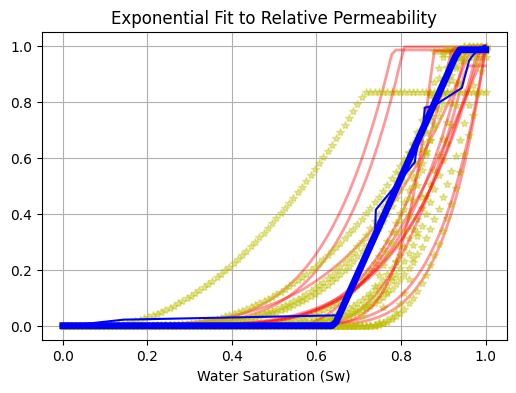

True
0.04114112667434067 0.07803329381740788


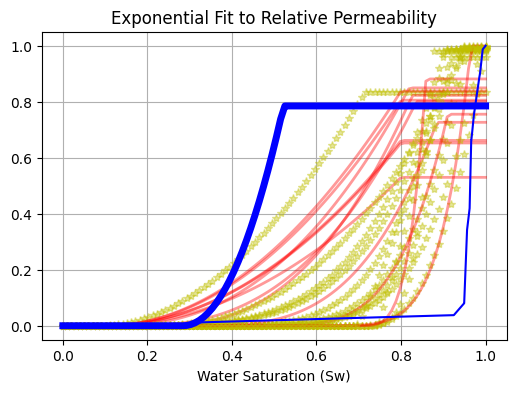

True
0.07943923883752899 0.15379542639236793


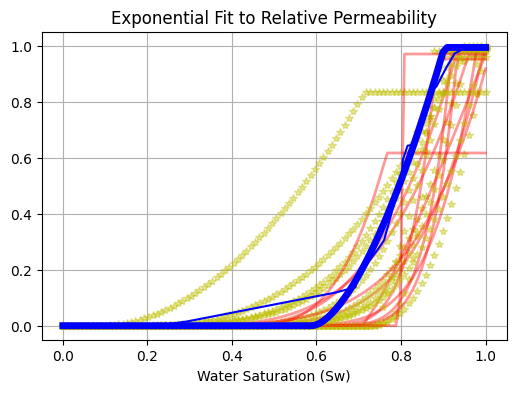

True
0.06020122396857658 0.17452259441416343


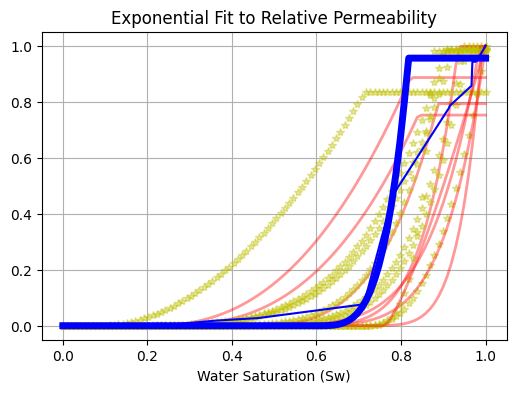

True
0.11341154482998073 0.18626236102572616


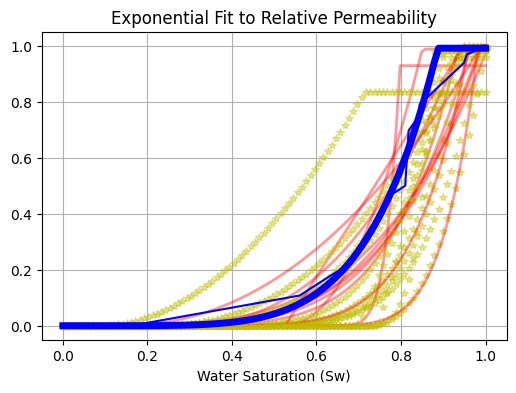

True
0.20434464124366067 0.2030930149798528


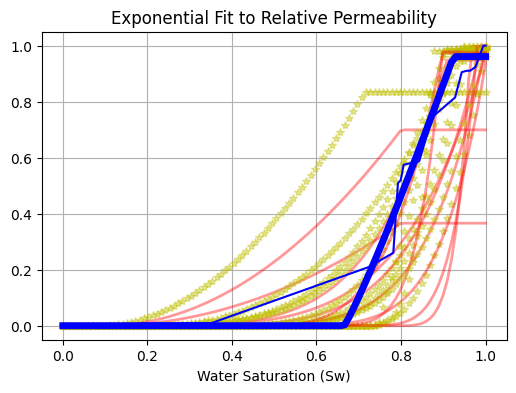

True
0.23424691563498343 0.27659985404897114


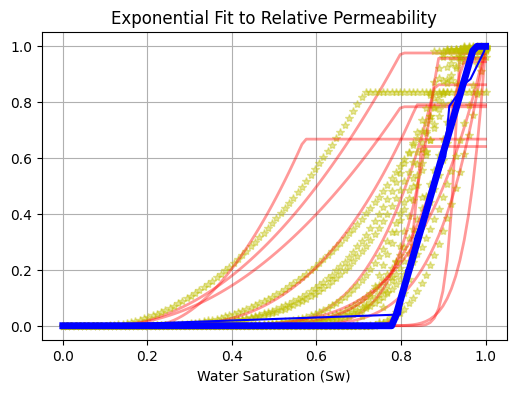

True
0.2049923652746044 0.2317905448170637


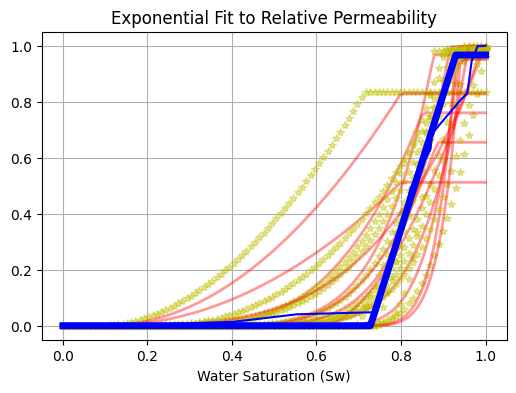

In [14]:
root_dir = 'db'
ct_idx = 2
vol_dim = 3

with open(f'{root_dir}/sample_{ct_idx}/phys_results_{vol_dim}.pickle', 'rb') as file:
    # Deserialize the data from the file and assign it to a variable
    sim_results = pickle.load(file)


for sample_idx in range(8):
    plot_ensemble_results(sim_results, sample_idx, metric='mse')


In [9]:
sample_idx = 4
realization_num = 5
df = sim_results[sample_idx]['generate'][realization_num]
df = convert_dict_to_pd(df)
# drop nan
df = df.dropna()

In [10]:
def krw_model(sw, krw0, swirr, sor, nw):
    denominator = 1 - sor - swirr
    if denominator == 0:
        return np.zeros_like(sw)
    return krw0 * np.maximum(0, np.minimum(1, (sw - swirr) / denominator)) ** nw

def kro_model(sw, kro0, sor, swirr, no):
    so = 1 - sw
    denominator = 1 - sor - swirr
    if denominator == 0:
        return np.zeros_like(so)
    return kro0 * np.maximum(0, np.minimum(1, (so - sor) / denominator)) ** no

# Initial guess for parameters
init_guess_krw = [1, 0.1, 0.2, 2]  # [krw0, swirr, sor, nw]
init_guess_kro = [1, 0.2, 0.1, 2]  # [kro0, sor, swirr, no]

bounds_krw = ([0, 0, 0, 1], [1, 1, 1, 6])
bounds_kro = ([0, 0, 0, 1], [1, 1, 1, 6])

popt_krw, pcov_krw = curve_fit(krw_model, df['sw'].values, df['kr_water'].values, p0=init_guess_krw, bounds=bounds_krw)
popt_kro, pcov_kro = curve_fit(kro_model, df['sw'].values, df['kr_air'].values, p0=init_guess_kro, bounds=bounds_kro)

print("Fitted parameters for krw:", popt_krw)
print("Fitted parameters for kro:", popt_kro)


Fitted parameters for krw: [0.92905439 0.39267433 0.07966081 3.84871292]
Fitted parameters for kro: [0.99272184 0.01090984 0.07674443 1.        ]


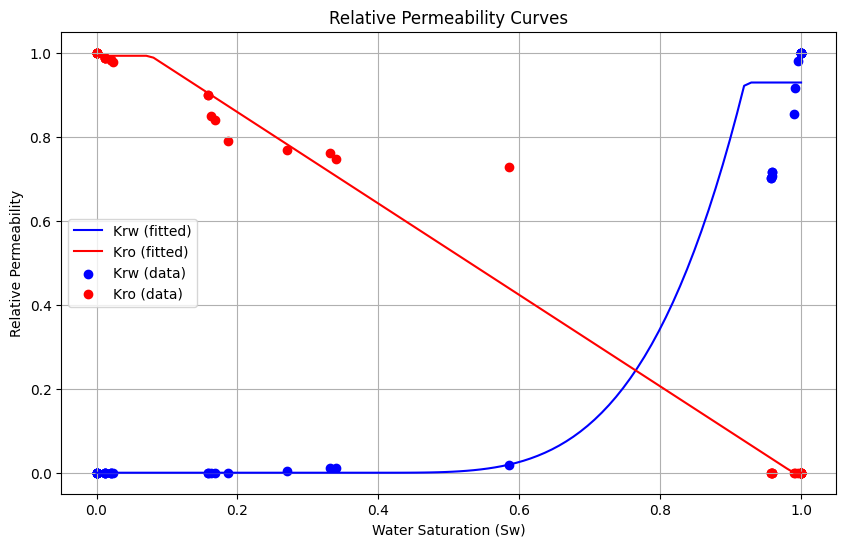

In [11]:
def generate_kr_data(sw_array, krw_params, kro_params):
    krw0, swirr, sor_w, nw = krw_params
    kro0, sor_o, swirr_o, no = kro_params

    krw = krw_model(sw_array, krw0, swirr, sor_w, nw)
    kro = kro_model(sw_array, kro0, sor_o, swirr_o, no)

    return krw, kro

sw_new = np.linspace(0, 1, 100)
krw_new, kro_new = generate_kr_data(sw_new, popt_krw, popt_kro)
plt.figure(figsize=(10, 6))
plt.plot(sw_new, krw_new, 'b-', label='Krw (fitted)')
plt.plot(sw_new, kro_new, 'r-', label='Kro (fitted)')
plt.scatter(df['sw'], df['kr_water'], c='blue', marker='o', label='Krw (data)')
plt.scatter(df['sw'], df['kr_air'], c='red', marker='o', label='Kro (data)')

plt.xlabel('Water Saturation (Sw)')
plt.ylabel('Relative Permeability')
plt.title('Relative Permeability Curves')
plt.legend()
plt.grid(True)
plt.show()


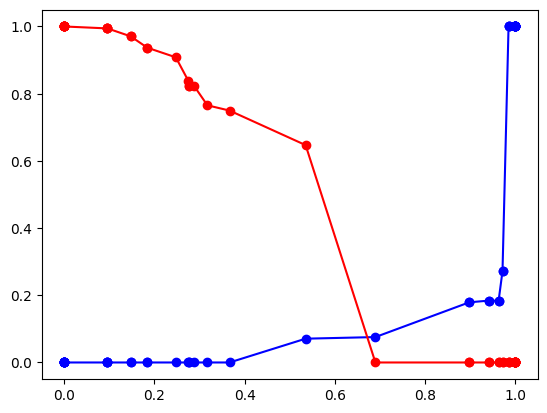

In [5]:
plt.plot(df['sw'], df['kr_water'], c='blue', marker='o', label='Krw (data)')
plt.plot(df['sw'], df['kr_air'], c='red', marker='o', label='Kro (data)')

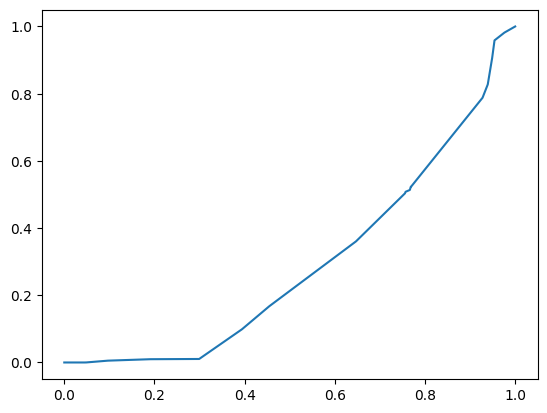

In [11]:
plt.plot(df['sw'],df['kr_water'])

/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (

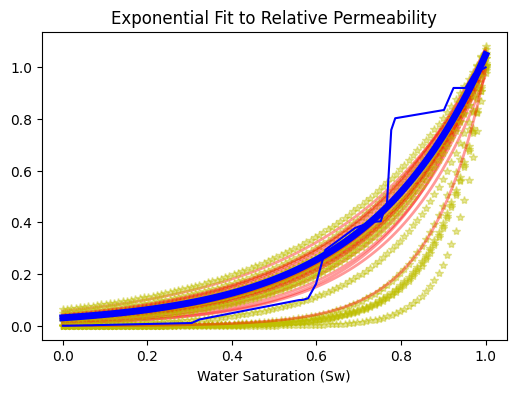

/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn

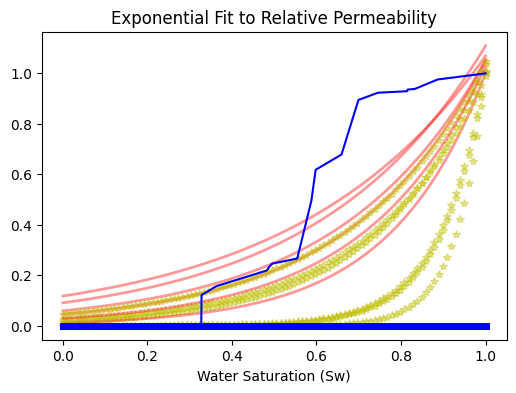

/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be est

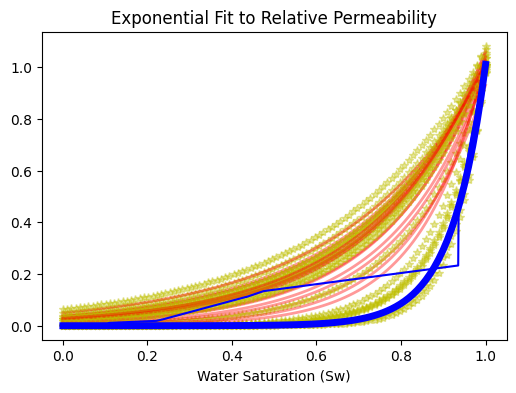

/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/pyt

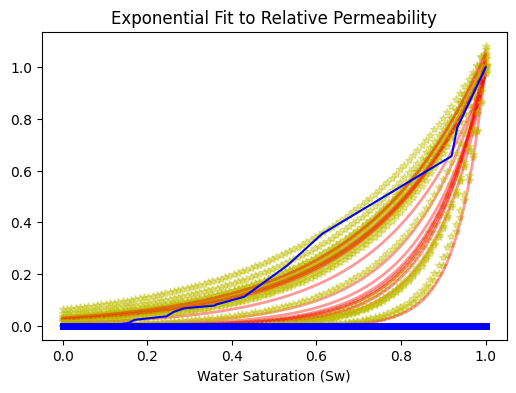

/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn

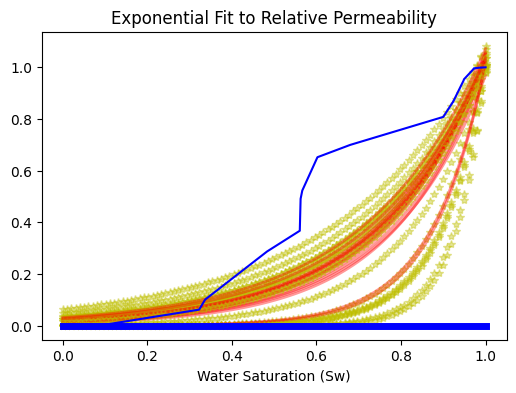

/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (

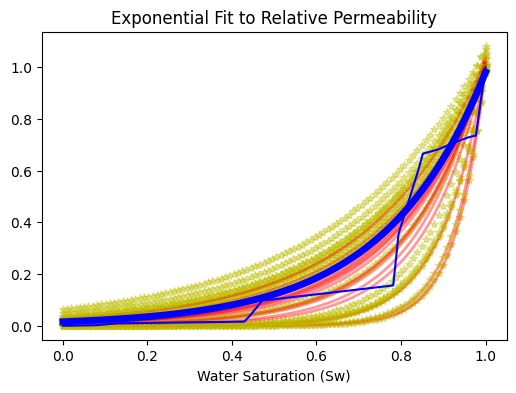

In [5]:
root_dir = 'db'
ct_idx = 3
vol_dim = 3
with open(f'{root_dir}/sample_{ct_idx}/phys_results_{vol_dim}.pickle', 'rb') as file:
    # Deserialize the data from the file and assign it to a variable
    sim_results = pickle.load(file)

for sample_idx in range(7):
    try:
        plot_sample(sample_idx)
    except:
        continue

/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (

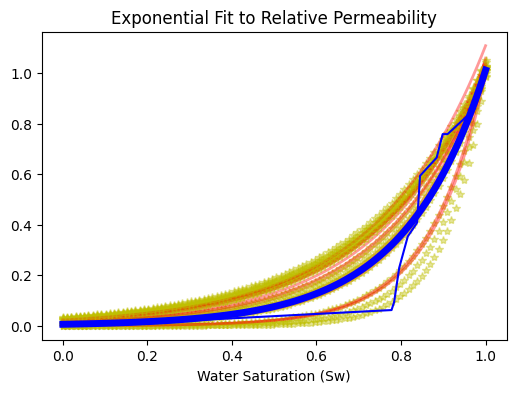

/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be est

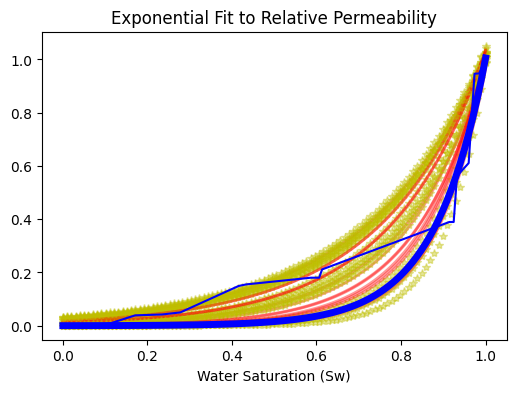

/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn

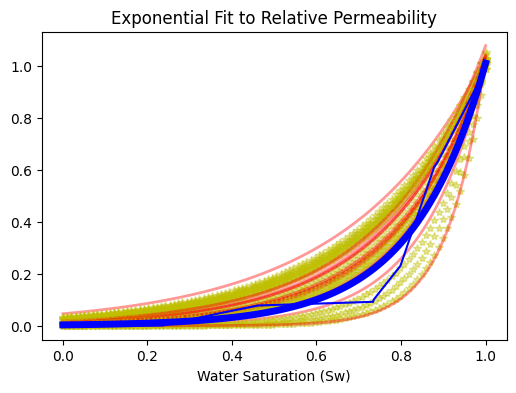

/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be est

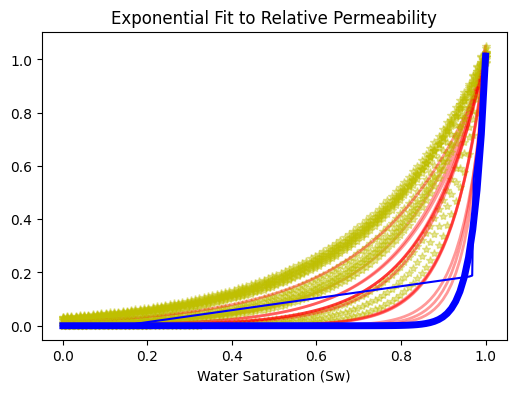

/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (

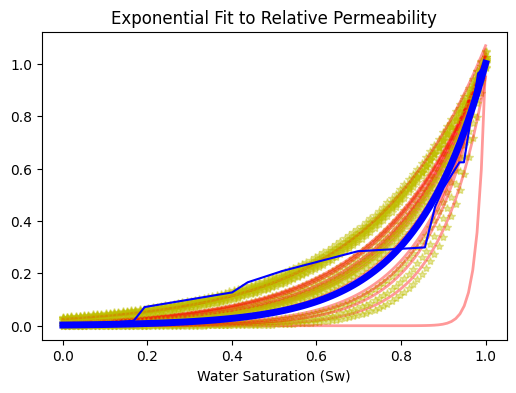

/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn

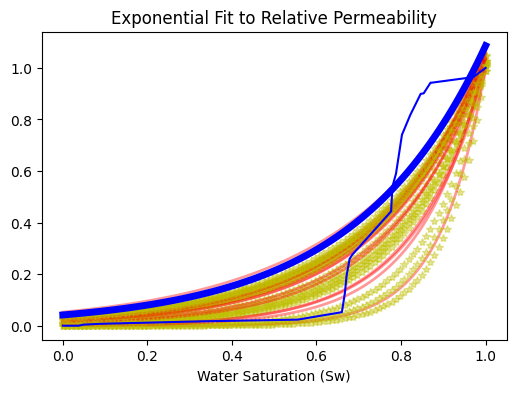

/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (

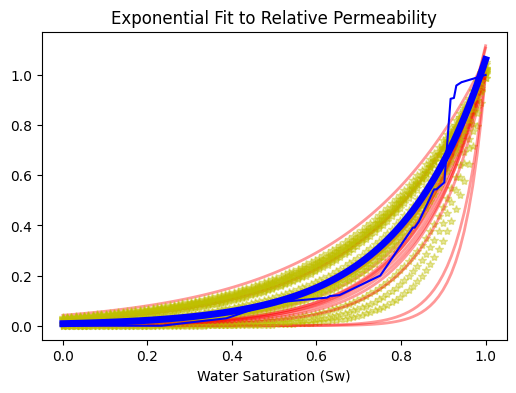

In [6]:
root_dir = 'db'
ct_idx = 1
vol_dim = 3
with open(f'{root_dir}/sample_{ct_idx}/phys_results_{vol_dim}.pickle', 'rb') as file:
    # Deserialize the data from the file and assign it to a variable
    sim_results = pickle.load(file)

for sample_idx in range(7):
    try:
        plot_sample(sample_idx)
    except:
        continue

/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',
/journel/s0/zur74/LatentPoreUpscale3DNet/lpu3dnet/post_process/kr_process.py:26: RuntimeWarning: divide by zero encountered in true_divide
  return krnw0 * np.exp(-c * Sw / (1 - Sw))
/journel/s0/zur74/venv/pnm-old/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn

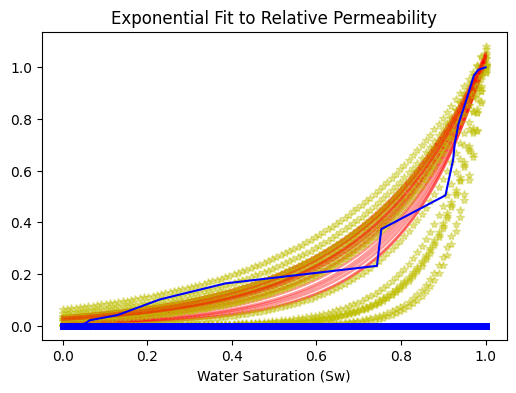

In [2]:
sample_idx = 7
# df_all_compare = aggregate_kr(sim_results['compare'])
num_pred = len(sim_results[sample_idx]['generate'])
num_compare = len(sim_results['compare'])

prediction = [] 
compare = []
for i in range(num_pred):
    df_pred = convert_dict_to_pd(sim_results[sample_idx]['generate'][i])
    exp_fit = Exponential_fit(df_pred)
    kr_avg_pred = exp_fit.generate_kr_data()
    if clean_df(kr_avg_pred):
        prediction.append(kr_avg_pred)
    


for i in range(num_compare):
    df_compare = convert_dict_to_pd(sim_results['compare'][i])
    exp_fit = Exponential_fit(df_compare)
    kr_avg_compare = exp_fit.generate_kr_data()
    if clean_df(kr_avg_compare):
        compare.append(kr_avg_compare)

df_real = sim_results[sample_idx]['original']
# fit the real data
df_real = convert_dict_to_pd(df_real)
exp_fit = Exponential_fit(df_real)
kr_real = exp_fit.generate_kr_data()


#%%
num_samples = min(len(prediction), len(compare))
f = plt.figure(figsize=(6, 4))
for i in range(num_samples):
    plt.plot(prediction[i]['sw'], prediction[i]['krw'], 'r-',linewidth=2,alpha=0.4)
    plt.plot(compare[i]['sw'], compare[i]['krw'], 'y*',linewidth=1,alpha=0.4)
    plt.title('Exponential Fit to Relative Permeability')
    plt.xlabel('Water Saturation (Sw)')
plt.plot(kr_real['sw'], kr_real['krw'], color='blue',linewidth=5, label='Actual Data')
plt.plot(df_real['sw'], df_real['kr_water'], color='blue', label='Actual Data')
plt.show()